#### 의사결정나무

In [1]:
import numpy as np
import pandas as pd

# 풍속을 threshold(기준이 되는 값)에 따라 분리하는 의사결정나무 함수 생성

def binary_tree(data, threshold):
    
    # 초기화
    yes = []
    no = []
    
    # data로부터 풍속 값마다 비교하기 위한 반복문
    for wind in data['풍속']:
        
        # threshold와 비교하기 위해 분리
        if wind > threshold:
            yes.append(wind)
        else:
            no.append(wind)
            
    # 예측한 결과를 데이터 프레임 형태로 저장
    data_yes = pd.DataFrame({'풍속':yes, '예상 지연 여부':['Yes']*len(yes)})
    data_no = pd.DataFrame({'풍속':no, '예상 지연 여부':['no']*len(no)})
    
    return data_no.append(data_yes, ignore_index=True)
    # data_no 뒤에 data_yes를 붙이고, 각각 만들어진 index 무시하고 새로 만들기
    
# 풍속에 따른 항공지연 데이터
Wind = [1, 1.5, 2.5, 5, 5.5, 6.5]
Delay  = ['No', 'No', 'No', 'Yes', 'Yes', 'Yes']

In [2]:
data = pd.DataFrame({'풍속':Wind, '지연여부':Delay})
print(data)

    풍속 지연여부
0  1.0   No
1  1.5   No
2  2.5   No
3  5.0  Yes
4  5.5  Yes
5  6.5  Yes


In [3]:
"""
1. binary_tree 모델을 사용하여 항공 지연 여부를 예측합니다.
   data의 지연 여부와 예상 지연 여부가 같은 값이 나오도록 의사결정나무의 
   결과물을 data_pred에 저장하세요.
"""
data_pred = binary_tree(data, threshold=4)

print(data_pred)

    풍속 예상 지연 여부
0  1.0       no
1  1.5       no
2  2.5       no
3  5.0      Yes
4  5.5      Yes
5  6.5      Yes


#### sklearn 의사결정나무 - 데이터 전처리

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
# sklearn 저장된 데이터 불러오기

X, y = load_iris(return_X_y=True)

In [6]:
# 데이터프레임으로 변환

df = pd.DataFrame(X, columns=['꽃받침길이', '꽃받침넓이', '꽃잎길이', '꽃잎넓이'])
df.head()

,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['클래스(품종)']=y
df.head()

,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이,클래스(품종)
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# 학습용, 평가용 데이터 

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 원본 데이터 출력
print(df)

# 전처리한 데이터 5개만 추출, 출력
print(train_X[:5])
print(train_y[:5])
print(test_X[:5])
print(test_y[:5])

     꽃받침길이  꽃받침넓이  꽃잎길이  꽃잎넓이  클래스(품종)
0      5.1    3.5   1.4   0.2        0
1      4.9    3.0   1.4   0.2        0
2      4.7    3.2   1.3   0.2        0
3      4.6    3.1   1.5   0.2        0
4      5.0    3.6   1.4   0.2        0
..     ...    ...   ...   ...      ...
145    6.7    3.0   5.2   2.3        2
146    6.3    2.5   5.0   1.9        2
147    6.5    3.0   5.2   2.0        2
148    6.2    3.4   5.4   2.3        2
149    5.9    3.0   5.1   1.8        2

[150 rows x 5 columns]
[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]
[0 0 1 0 0]
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]
[1 0 2 1 1]


In [10]:
from matplotlib import pyplot as plt
from sklearn import tree

In [11]:
# 의사결정나무 모델 초기화, 학습

DTmodel = DecisionTreeClassifier(max_depth=2) # 깊이 조절 가능 : max_depth

In [12]:
DTmodel.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=2)

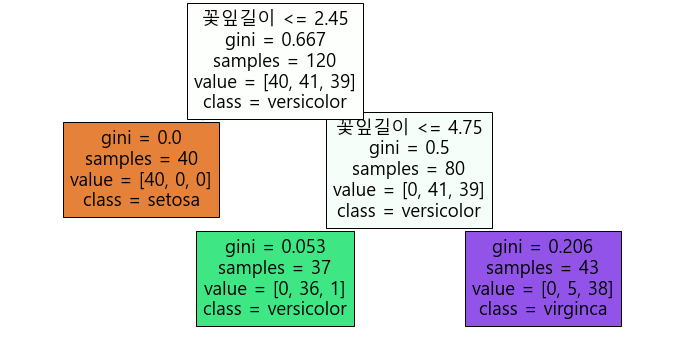

In [13]:
# 학습한 결과 출력

plt.rc('font', family = 'Malgun Gothic')
fig = plt.figure(figsize = (12,6))
tree.plot_tree(DTmodel, 
              feature_names=['꽃받침길이', '꽃받침넓이', '꽃잎길이', '꽃잎넓이'],
              class_names=['setosa','versicolor','virginca'],
              filled=True)
plt.show()

#### 예측하기

In [14]:
# test data로 예측하기
DTmodel.predict(test_X)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

#### 

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [16]:
# data 불러오기

X, y = load_breast_cancer(return_X_y=True)
X = np.array(X)
y = np.array(y)

In [17]:
len(X[0])  # feature 개수

30

In [18]:
X.shape

(569, 30)

In [19]:
# 학습용 데이터, 평가용 데이터 분리

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
len(test_y)   # 평가용 샘플 개수

114

In [21]:
len(test_y) - sum(test_y)  # 클래스 0인 평가용 샘플

43

In [22]:
sum(test_y) # 클래스 1인 평가용 샘플

71

In [23]:
# 의사결정나무모델(DecisionTreeClassifier) 초기화해서 DTmodel 생성, 학습하기
DTmodel = DecisionTreeClassifier()
DTmodel.fit(train_X, train_y)

DecisionTreeClassifier()

In [24]:
# 예측
y_pred = DTmodel.predict(test_X)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

Confusion Matrix : 
 [[39  4]
 [ 3 68]]


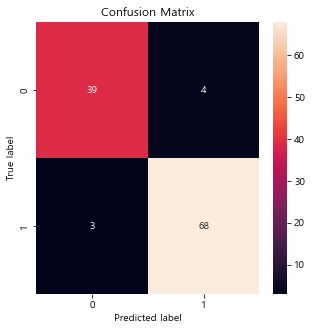

In [31]:
# 혼동행렬(confusion_matrix)

"""
1. 혼동 행렬을 계산합니다
"""
cm = confusion_matrix(test_y, y_pred)
print('Confusion Matrix : \n {}'.format(cm))

# 혼동 행렬을 출력합니다
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm, annot=True)
ax.set(title='Confusion Matrix',
            ylabel='True label',
            xlabel='Predicted label')
fig.savefig("decistion_tree.png")
#elice_utils.send_image("decistion_tree.png")

In [26]:
# 예측한 값 저장
y_pred_train = DTmodel.predict(train_X)
y_pred_test = DTmodel.predict(test_X)

# 혼동행렬 계산
cm_train = confusion_matrix(train_y, y_pred_train)
cm_test = confusion_matrix(test_y, y_pred_test)

print('train_X confusion_matrix : \n{}'.format(cm_train))
print('test_X confusion_matrix : \n{}'.format(cm_test))

train_X confusion_matrix : 
[[169   0]
 [  0 286]]
test_X confusion_matrix : 
[[39  4]
 [ 3 68]]


In [27]:
# 정확도 계산

acc_train = DTmodel.score(train_X, train_y)
acc_test = DTmodel.score(test_X, test_y)

# 정확도를 출력합니다.
print('train_X Accuracy: %f' % (acc_train))
print('test_X Accuracy: %f' % (acc_test))

train_X Accuracy: 1.000000
test_X Accuracy: 0.938596


In [28]:
accuracy_score(test_y, y_pred)

0.9385964912280702

In [29]:
# 정밀도 계산

precision_train = precision_score(train_y, y_pred_train)
precision_test = precision_score(test_y, y_pred_test)

# 정밀도를 출력합니다.
print('train_X precision: %f' % (precision_train))
print('test_X precision: %f' % (precision_test))

train_X precision: 1.000000
test_X precision: 0.944444


In [30]:
# 재현율 계산

recall_train = recall_score(train_y, y_pred_train)
recall_test = recall_score(test_y, y_pred_test)

# 재현율를 출력합니다.
print('train_X recall: %f' % (recall_train))
print('test_X recall: %f' % (recall_test))

train_X recall: 1.000000
test_X recall: 0.957746
